In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex7')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")


%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import general
from helper import pca


C:\Users\Administrator\Desktop\ml_ipynb\ex7


 # 使用PCA降维人脸数据

 ## 1 加载数据和展示

In [2]:
mat = sio.loadmat('./data/ex7faces.mat')
print(mat.keys())
raw_data = mat.get('X')
# 5000行数据,每一行都是32-32的图片
print(raw_data.shape)


dict_keys(['__header__', '__version__', '__globals__', 'X'])
(5000, 1024)


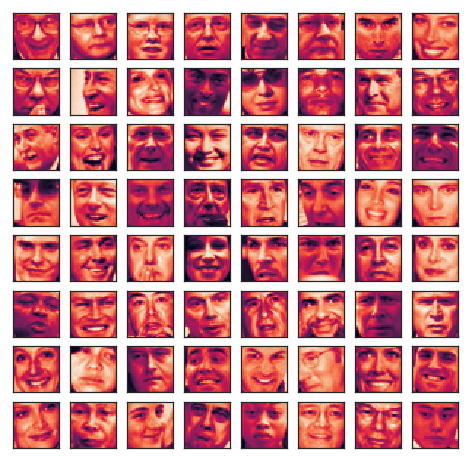

In [3]:
# 把每一行数据都恢复成32-32,必须转置,不然图片是倒转的
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
pca.plot_n_image(X, n=64)




 ## 2 运行PCA

In [4]:
U, _, _ = pca.pca(X)
# 可以看到,因为特征是1024维的,所以有1024个特征向量
U.shape


(1024, 1024)

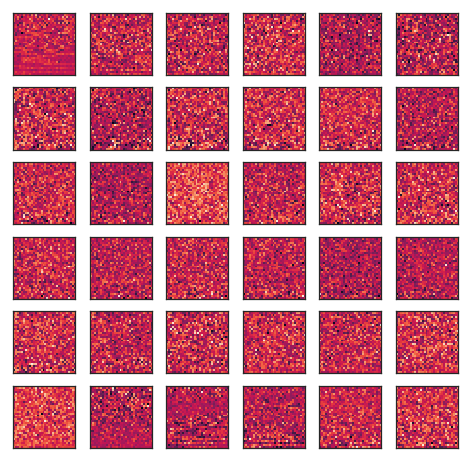

In [5]:
# 完全看不出来有人脸数据啊
pca.plot_n_image(U, n=36)



 ## 3 把数据降维到k = 100

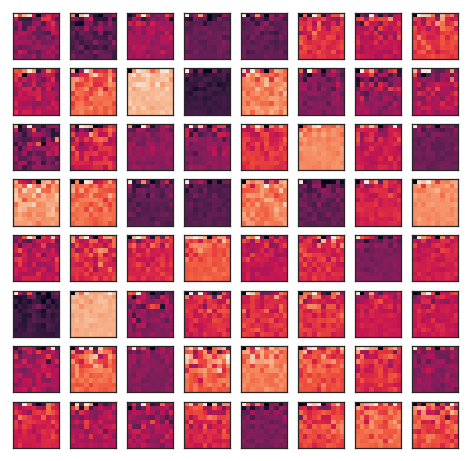

In [6]:
# 还是看不出人脸
Z = pca.project_data(X, U, k=100)
pca.plot_n_image(Z, n=64)



 ## 4 恢复数据

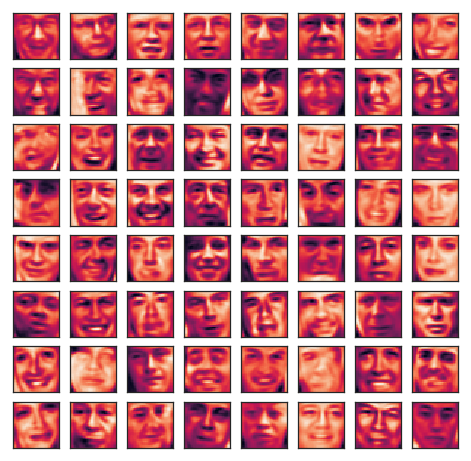

In [7]:
# 现在可以看出人脸了,虽然丢失了一些细节
X_recover = pca.recover_data(Z, U)
pca.plot_n_image(X_recover, n=64)




 ## 5 使用sk

In [8]:
from sklearn.decomposition import PCA
sk_pca = PCA(n_components=100)
Z = sk_pca.fit_transform(X)
#[5000 10]
Z.shape


(5000, 100)

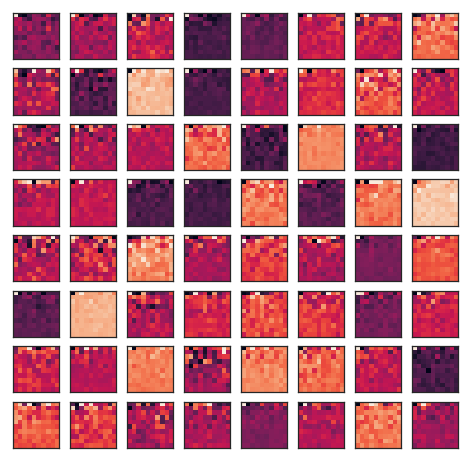

In [9]:
pca.plot_n_image(Z, 64)



In [10]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape


(5000, 1024)

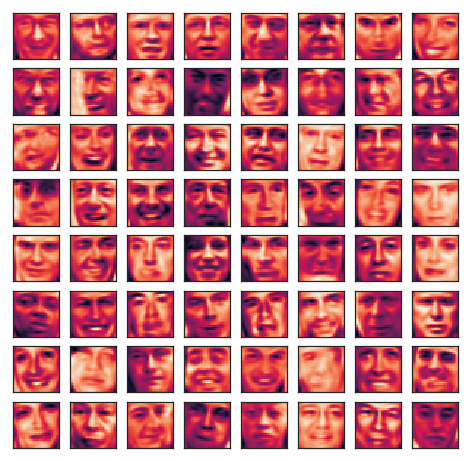

In [11]:
pca.plot_n_image(X_recover, n=64)

